<a href="https://colab.research.google.com/github/DonRoboto/CursoMOO/blob/main/Tarea2_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
from sympy import *
import matplotlib.pyplot as plt
import scipy, pylab


In [2]:
p_1 = [i/10 for i in range(0, 11)]
p_2=[]

for i in range(len(p_1)):
  p_2.append(round(1-p_1[i],2))

print(p_1)
print(p_2)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
[1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]


In [53]:
x_1 = Symbol('x_1')
x_2 = Symbol('x_2')

#Tarea 1
#𝐹(𝑥_1,𝑥_2 ) = (𝑥_1−1)^2+(𝑥_2−1)^4; (𝑥_1+1)^2+(𝑥_2+1)^2] 
#con 𝒳=[−3, 3]×[−3, 3]
#(1-1, 1-2, 3, 4 y 5)

f1 = (x_1-1)**2 + (x_2-1)**4
f2 = (x_1+1)**2 + (x_2+1)**2

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


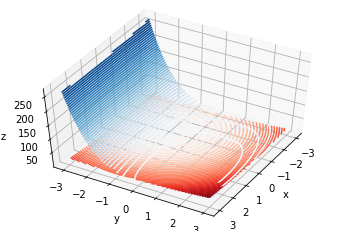

In [4]:
#graficamente
def fg1(x, y):
    return ((x-1)**2) + ((y-1)**4)
      
def fg2(x, y):
  return ((x+1)**2) + ((y+1)**2)

xg = np.linspace(-3, 3, 50)
yg = np.linspace(-3, 3, 50)

Xg, Yg = np.meshgrid(xg, yg)
Zg1 = fg1(Xg, Yg)
Zg2 = fg2(Xg, Yg)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.view_init(50, 30)

ax.contour3D(Xg, Yg, Zg1, 50, cmap='Blues')
ax.contour3D(Xg, Yg, Zg2, 50, cmap='Reds')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

Text(0, 0.5, 'f2')

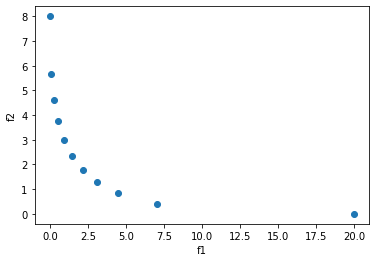

In [5]:
g1 = []
g2 = []

for i in range(len(p_1)):
  w1 = p_1[i]
  w2 = p_2[i]
  
  fx = (w1 * f1) + (w2 * f2)

  dx = fx.diff(x_1)
  dy = fx.diff(x_2)

  sol = solve((dx, dy),(x_1, x_2))

  if len(sol)>2:
    xs = sol[0][0]
    ys = sol[0][1]    
  else:
    xs = sol[x_1]
    ys = sol[x_2]

  
  f1s = f1.subs([ (x_1, xs), (x_2, ys) ] ).doit()
  f2s = f2.subs([ (x_1, xs), (x_2, ys) ] ).doit()

  g1.append(f1s)    
  g2.append(f2s)    


ax = pylab.subplot(111)
ax.scatter(g1, g2)
ax.figure.show()

ax.set_xlabel('f1')
ax.set_ylabel('f2')

In [6]:
def Gradient(fx, X):
  return np.array( [ [fx.diff(x_1).subs( [(x_1, float(X[0])), (x_2, float(X[1]))]  )], [fx.diff(x_2).subs( [(x_1, float(X[0])), (x_2, float(X[1]))]  ) ] ] )  

def Direction(fx, X):  
  dy = -1 * Gradient(fx, X)
  return dy

def Step_Size(fx, X, alpha, ro, c):
  counter = 0
  origen_0 = fx.subs([(x_1, float(X[0])), (x_2, float(X[1]))]).doit()
  f_k = origen_0
  
  pk = Direction(fx, X)
  
  g = Gradient(fx, X)

  while True:
    dato1 = X  + (alpha * pk)
    destino = fx.subs([(x_1, float(dato1[0])), (x_2, float(dato1[1]))]).doit()

    dato3 = (c * alpha) * np.dot(g.T, pk)
    penal_0 = dato3[0,0]

    f_n = round(float(destino), 6)
    penalty = round(float(penal_0), 6)

    if (f_n <= f_k + penalty) or (counter>100):
      return alpha

    alpha = round(ro * alpha, 6)
    counter = counter + 1

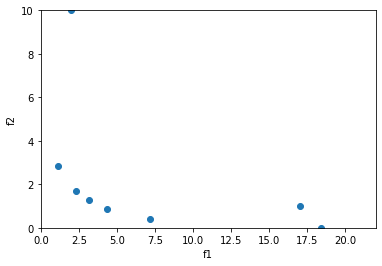

In [7]:
ax = pylab.subplot(111)

prev_val = 1000000
epsilon = 0.00001
counter=0
max_value=10000

alpha=0.001
ro=0.1
c=0.1

graph1=[]
graph2=[]



for j in range(len(p_1)):
  xv0 = random.randint(-3, 3)
  xv1 = random.randint(-3, 3)

  X = np.array([[xv0], [xv1]])

  w1 = p_1[j]
  w2 = p_2[j]

  func = w1 * f1 + w2 * f2
  
  while True:
    pk = Direction(func, X)

    alpha = Step_Size(func, X, alpha, ro, c)

    Xn = X + (alpha * pk) 
    actual_val = func.subs([ (x_1, float(Xn[0])), (x_2, float(Xn[1])) ] )

    if (round(abs(actual_val - prev_val), 6)<epsilon) or (counter>=max_value):
      break

    X = Xn
    prev_val = actual_val
    counter = counter + 1

  f_1 = f1.subs([(x_1, float(X[0])), (x_2, float(X[1]))]).doit()
  f_2 = f2.subs([(x_1, float(X[0])), (x_2, float(X[1]))]).doit()

  graph1.append(f_1)
  graph2.append(f_2)


ax.set_xlabel('f1')
ax.set_ylabel('f2')

plt.scatter(graph1, graph2)

plt.xlim(0, 22)
plt.ylim(0, 10)
plt.show()

In [170]:
graph1=[]
graph2=[]

#vector de referencia
d = np.array([[-1],[-1]]).T

#puntos de evaluacion X0
xv0 = random.randint(-3, 3)
xv1 = random.randint(-3, 3)
X1 = np.array([[xv0], [xv1]])

#gradiente1
grad1 = Gradient(f1, X1)
xg1_1 = float(grad1[0][0])
xg1_2 = float(grad1[1][0])
ev1 = f1.subs([ (x_1, float(xg1_1)), (x_2, float(xg1_2)) ] )

grad2 = Gradient(f2, X1)
xg2_1 = float(grad2[0][0])
xg2_2 = float(grad2[1][0])
ev2 = f2.subs([ (x_1, float(xg2_1)), (x_2, float(xg2_2)) ] )

m=np.array([[float(ev1), float(ev2)]])

#pseudo inversa
pinv = np.linalg.pinv(m)

res=np.matmul(d, pinv)

v = res[0][0]

xv0_1 = xv0 + v
xv1_1 = xv1 + v

X1_1 = np.array([[xv0_1], [xv1_1]])

ra = f1.subs([ (x_1, float(X1_1[0])), (x_2, float(X1_1[1])) ] )
rb = f2.subs([ (x_1, float(X1_1[0])), (x_2, float(X1_1[1])) ] )

graph1.append(ra)
graph2.append(rb)

In [171]:

for i in range(100):
  grad1 = Gradient(f1, X1_1)
  xg1_1 = float(grad1[0][0])
  xg1_2 = float(grad1[1][0])
  ev1 = f1.subs([ (x_1, float(xg1_1)), (x_2, float(xg1_2)) ] )

  grad2 = Gradient(f2, X1_1)
  xg2_1 = float(grad2[0][0])
  xg2_2 = float(grad2[1][0])
  ev2 = f2.subs([ (x_1, float(xg2_1)), (x_2, float(xg2_2)) ] )

  m=np.array([[float(ev1), float(ev2)]])

  #pseudo inversa
  pinv = np.linalg.pinv(m)

  res=np.matmul(d, pinv)

  v  = res[0][0]

  xv0_1 = xv0_1 + v
  xv1_1 = xv1_1 + v

  X1_1 = np.array([[xv0_1], [xv1_1]])
  #print(X1_1)

  ra = f1.subs([ (x_1, float(X1_1[0])), (x_2, float(X1_1[1])) ] )
  rb = f2.subs([ (x_1, float(X1_1[0])), (x_2, float(X1_1[1])) ] )

  graph1.append(ra)
  graph2.append(rb)

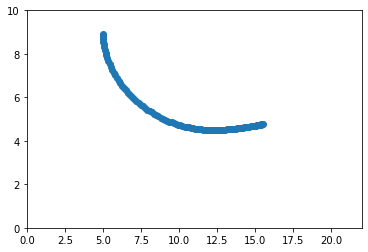

In [172]:
ax.set_xlabel('f1')
ax.set_ylabel('f2')

plt.scatter(graph1, graph2)

plt.xlim(0, 22)
plt.ylim(0, 10)
plt.show()

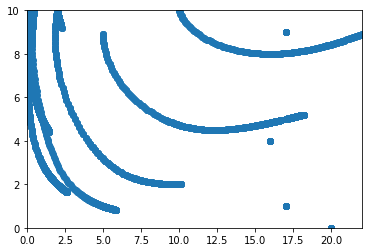

In [175]:
graph1=[]
graph2=[]

#vector de referencia
d = np.array([[-1],[-1]]).T

for k in range(100):
  #puntos de evaluacion X0
  xv0 = random.randint(-3, 3)
  xv1 = random.randint(-3, 3)
  X1 = np.array([[xv0], [xv1]])

  #gradiente1
  grad1 = Gradient(f1, X1)
  xg1_1 = float(grad1[0][0])
  xg1_2 = float(grad1[1][0])
  ev1 = f1.subs([ (x_1, float(xg1_1)), (x_2, float(xg1_2)) ] )

  grad2 = Gradient(f2, X1)
  xg2_1 = float(grad2[0][0])
  xg2_2 = float(grad2[1][0])
  ev2 = f2.subs([ (x_1, float(xg2_1)), (x_2, float(xg2_2)) ] )

  m=np.array([[float(ev1), float(ev2)]])

  #pseudo inversa
  pinv = np.linalg.pinv(m)

  res=np.matmul(d, pinv)

  v = res[0][0]

  xv0_1 = xv0 + v
  xv1_1 = xv1 + v

  X1_1 = np.array([[xv0_1], [xv1_1]])

  ra = f1.subs([ (x_1, float(X1_1[0])), (x_2, float(X1_1[1])) ] )
  rb = f2.subs([ (x_1, float(X1_1[0])), (x_2, float(X1_1[1])) ] )

  graph1.append(ra)
  graph2.append(rb)

  for i in range(100):
    grad1 = Gradient(f1, X1_1)
    xg1_1 = float(grad1[0][0])
    xg1_2 = float(grad1[1][0])
    ev1 = f1.subs([ (x_1, float(xg1_1)), (x_2, float(xg1_2)) ] )

    grad2 = Gradient(f2, X1_1)
    xg2_1 = float(grad2[0][0])
    xg2_2 = float(grad2[1][0])
    ev2 = f2.subs([ (x_1, float(xg2_1)), (x_2, float(xg2_2)) ] )

    m=np.array([[float(ev1), float(ev2)]])

    #pseudo inversa
    pinv = np.linalg.pinv(m)

    res=np.matmul(d, pinv)

    v  = res[0][0]

    xv0_1 = xv0_1 + v
    xv1_1 = xv1_1 + v

    X1_1 = np.array([[xv0_1], [xv1_1]])

    ra = f1.subs([ (x_1, float(X1_1[0])), (x_2, float(X1_1[1])) ] )
    rb = f2.subs([ (x_1, float(X1_1[0])), (x_2, float(X1_1[1])) ] )

    graph1.append(ra)
    graph2.append(rb)


ax.set_xlabel('f1')
ax.set_ylabel('f2')

plt.scatter(graph1, graph2)

plt.xlim(0, 22)
plt.ylim(0, 10)
plt.show()